In [21]:
import psycopg2
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
from dotenv import load_dotenv
import os
from  src.database import connect
from src.pgn_parser import parse_moves



## Mes parties d'echecs

source chesscom pseudo gabrielpizzo

In [22]:
conn = connect()
query = """
SELECT cg.date,
        cg.date,
        cg.white_player,
        cg.black_player,
        cg.result,
        cg.black_elo,
        cg.white_elo,
        cg.time_control,
        cg.termination,
        cg.moves
FROM chess_games cg
"""
df = pd.read_sql_query(query, conn)
conn.close()

df.head()

/tmp/ipykernel_32906/2867011540.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,date,date,white_player,black_player,result,black_elo,white_elo,time_control,termination,moves
0,2024-02-13,2024-02-13,gabrielpizzo,BryMan222,1-0,1028,1068,300,gabrielpizzo a gagné au temps,e2e4 b7b6 g1f3 c8b7 b1c3 e7e6 d2d4 f8b4 f1d3 g...
1,2024-02-13,2024-02-13,jsum3,gabrielpizzo,0-1,1075,1009,300,gabrielpizzo a gagné au temps,e2e4 e7e5 g1f3 b8c6 f1c4 f8c5 c2c3 g8f6 d2d3 e...
2,2024-02-13,2024-02-13,gabrielpizzo,ahepburn94,0-1,1098,1067,300,ahepburn94 a gagné par échec et mat,e2e4 g7g6 g1f3 f8g7 d2d4 d7d6 c1e3 g8f6 b1c3 e...
3,2024-02-13,2024-02-13,krascko,gabrielpizzo,0-1,1074,1024,300,gabrielpizzo a gagné au temps,e2e4 e7e5 g1f3 b8c6 f1c4 f8c5 c2c3 g8f6 d2d3 e...
4,2024-02-13,2024-02-13,gabrielpizzo,GrosJoLav,0-1,1035,1065,300,GrosJoLav a gagné par échec et mat,e2e4 d7d5 e4d5 d8d5 b1c3 d5a5 d2d4 g8f6 g1f3 b...


In [23]:
df[['num_moves', 'first_two_moves']] = df['moves'].apply(parse_moves).apply(pd.Series)

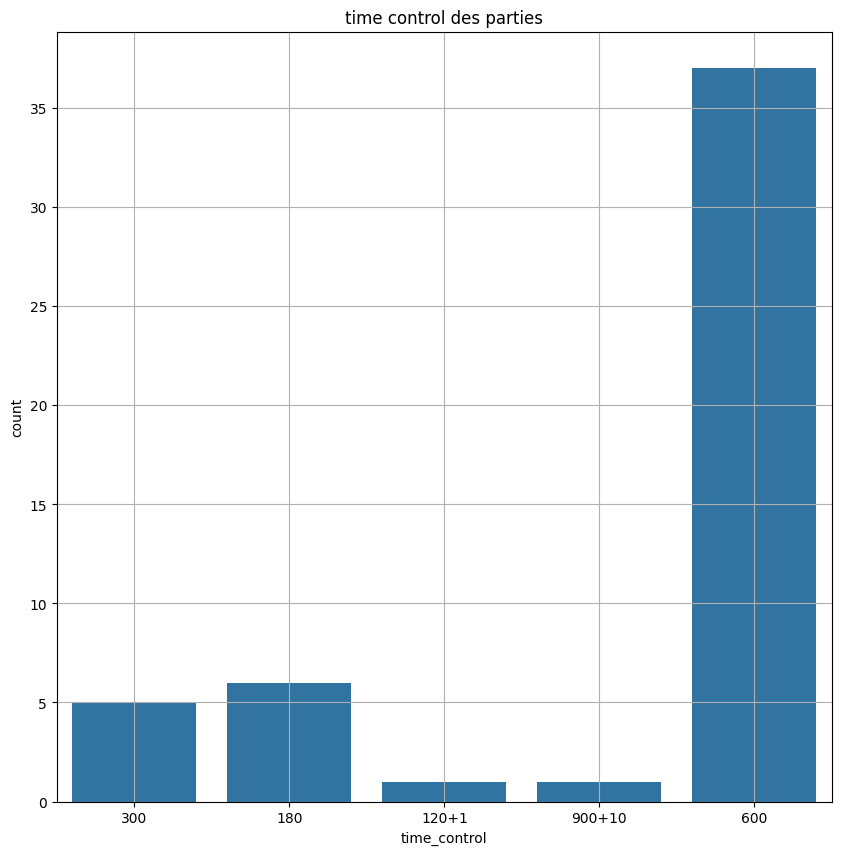

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x="time_control")
plt.title("time control des parties")
plt.grid()

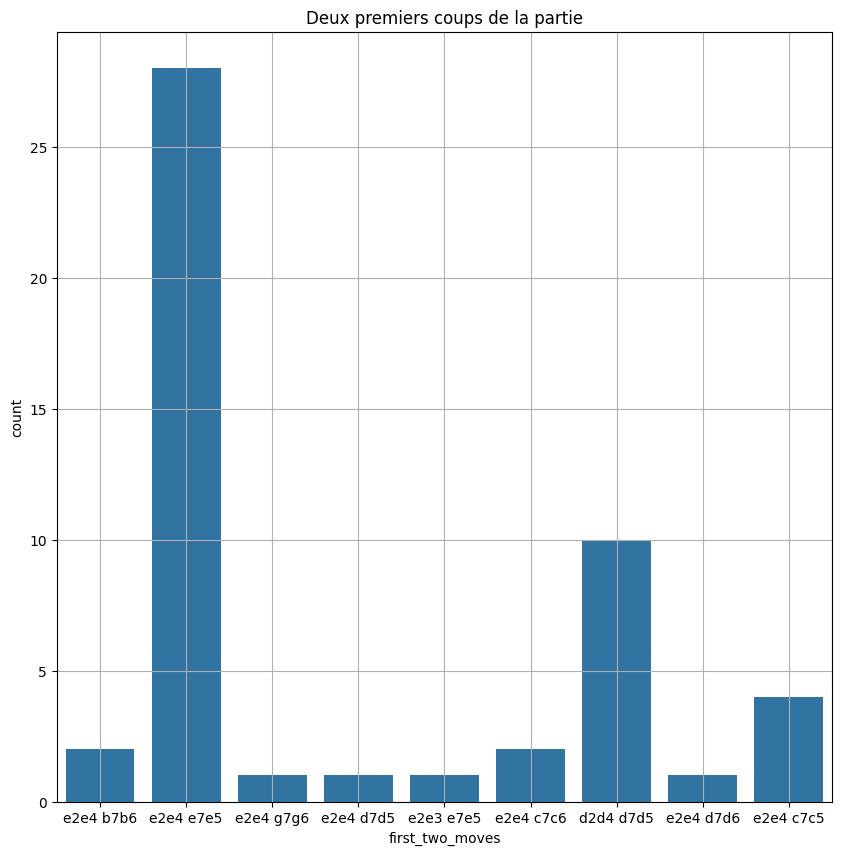

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x="first_two_moves")
plt.grid()
plt.title("Deux premiers coups de la partie")
plt.show()

In [26]:
df[["num_moves","first_two_moves"]].head(10)

,num_moves,first_two_moves
0,107,e2e4 b7b6
1,110,e2e4 e7e5
2,38,e2e4 g7g6
3,134,e2e4 e7e5
4,30,e2e4 d7d5
5,4,e2e3 e7e5
6,126,e2e4 e7e5
7,78,e2e4 c7c6
8,45,d2d4 d7d5
9,71,e2e4 e7e5
